In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder


In [2]:
data_org=pd.read_excel('World_development_mesurement.xlsx')
data_org.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"


In [3]:
#creating copy of original dataset
data=data_org.copy()
data.head(10)

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"
5,0.042,NaN,301.0,Burundi,NaN,NaN,NaN,"$870,486,066",0.063,$7,...,47.0,0.0,1,0.490,0.481,0.029,6674286,0.082,"$1,400,000","$14,000,000"
6,0.041,NaN,3432.0,Cameroon,NaN,NaN,6310.0,"$9,287,367,569",0.044,$26,...,51.0,0.0,1,0.453,0.513,0.034,15927713,0.455,"$132,000,000","$241,000,000"
7,0.039,NaN,268.0,Central African Republic,NaN,NaN,NaN,"$914,500,332",0.043,$11,...,42.0,0.0,1,0.423,0.537,0.040,3638316,0.376,"$5,000,000","$33,000,000"
8,0.051,NaN,176.0,Chad,NaN,NaN,NaN,"$1,385,058,212",0.063,$10,...,46.0,0.0,1,0.490,0.482,0.028,8301151,0.216,"$14,000,000","$56,000,000"
9,0.039,NaN,84.0,Comoros,NaN,NaN,NaN,"$201,899,884",0.035,$13,...,56.0,NaN,1,0.415,0.554,0.031,528312,0.281,"$15,000,000",NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

In [5]:
data["Country"].nunique()

208

In [6]:
#create a labelEncoder adjust
le = LabelEncoder() 

#fit and transform the "Country" column to the DataFrame
data["Country_encoded"] = le.fit_transform(data["Country"])

In [7]:
data["Country_encoded"]=data["Country_encoded"].astype(float)

In [8]:
data.drop(["Country"],axis=1,inplace=True)

In [9]:
#shape of the data
data.shape

(2704, 25)

In [10]:
##Remove $ from columns
data['GDP']=data['GDP'].astype(str).str.replace('$','',regex=True).str.replace(',','')
data['GDP']=pd.to_numeric(data['GDP'],errors='coerce')

data['Health Exp/Capita']=data['Health Exp/Capita'].astype(str).str.replace('$','',regex=True)
data['Health Exp/Capita']=pd.to_numeric(data['Health Exp/Capita'],errors='coerce')


data['Tourism Inbound']=data['Tourism Inbound'].astype(str).str.replace('$','',regex=True).str.replace('','')
data['Tourism Inbound']=pd.to_numeric(data['Tourism Inbound'],errors='coerce')


data['Tourism Outbound']=data['Tourism Outbound'].astype(str).str.replace('$','',regex=True).str.replace('','')
data['Tourism Outbound']=pd.to_numeric(data['Tourism Outbound'],errors='coerce')

#Remove %
data['Business Tax Rate']=data['Business Tax Rate'].astype(str).str.replace('%','',regex=True)
data['Business Tax Rate']=pd.to_numeric(data['Business Tax Rate'],errors='coerce')


In [11]:
#check distributions for numeric columns
data.describe()

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,Country_encoded
count,2585.000000,1423.000000,2.125000e+03,1718.000000,185.000000,1.785000e+03,2.494000e+03,2395.000000,1932.000000,1416.000000,...,2537.000000,2704.0,2484.000000,2484.000000,2484.000000,2.704000e+03,2678.000000,0.0,0.0,2704.00000
mean,0.022715,48.966901,1.423071e+05,39.999418,94.875676,7.723684e+04,2.638540e+11,0.064170,214.627847,302.068503,...,0.578124,1.0,0.303051,0.623481,0.073465,3.145729e+07,0.562953,NaN,NaN,103.50000
std,0.011338,40.954116,6.159288e+05,57.318588,54.791906,2.599239e+05,1.129910e+12,0.026325,233.750350,273.299686,...,0.474647,0.0,0.106577,0.069660,0.049541,1.242894e+08,0.245897,NaN,NaN,60.05484
min,0.007000,8.200000,7.000000e+00,1.000000,1.000000,8.000000e+00,6.310127e+07,0.008000,2.000000,12.000000,...,0.000000,1.0,0.118000,0.474000,0.003000,1.887600e+04,0.082000,NaN,NaN,0.00000
25%,0.013000,32.400000,1.360000e+03,13.000000,48.000000,3.737000e+03,3.539042e+09,0.046000,37.000000,156.000000,...,0.100000,1.0,0.204750,0.559000,0.033000,8.783360e+05,0.356000,NaN,NaN,51.75000
50%,0.020000,41.000000,8.529000e+03,26.000000,94.000000,1.433800e+04,1.507975e+10,0.061000,115.500000,239.000000,...,0.500000,1.0,0.299500,0.642500,0.052000,5.800324e+06,0.560000,NaN,NaN,103.50000
75%,0.031000,51.550000,5.910800e+04,45.000000,142.000000,4.185200e+04,1.102047e+11,0.079000,318.250000,344.750000,...,0.900000,1.0,0.402000,0.676000,0.112000,2.014089e+07,0.765000,NaN,NaN,155.25000
max,0.053000,339.100000,8.286892e+06,694.000000,189.000000,2.727728e+06,1.624460e+13,0.225000,998.000000,2600.000000,...,2.900000,1.0,0.500000,0.858000,0.244000,1.350695e+09,1.000000,NaN,NaN,207.00000


In [12]:
# drop "Number of Records" columns
data = data.drop(["Number of Records"],axis=1)

In [13]:
#check columns
data.columns

Index(['Birth Rate', 'Business Tax Rate', 'CO2 Emissions',
       'Days to Start Business', 'Ease of Business', 'Energy Usage', 'GDP',
       'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax',
       'Infant Mortality Rate', 'Internet Usage', 'Lending Interest',
       'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage',
       'Population 0-14', 'Population 15-64', 'Population 65+',
       'Population Total', 'Population Urban', 'Tourism Inbound',
       'Tourism Outbound', 'Country_encoded'],
      dtype='object')

In [14]:
data = data.rename(columns={'Birth Rate':'BirthRate', 'Business Tax Rate':'BusinessTaxRate', 'CO2 Emissions':'CO2Emissions',
       'Days to Start Business':'DaystoStartBusiness', 'Ease of Business':'EaseofBusiness', 'Energy Usage':'EnergyUsage', 'GDP':'GDP',
       'Health Exp % GDP': 'HealthExpGDP', 'Health Exp/Capita':'HealthExpCapita', 'Hours to do Tax':'HourstodoTax',
       'Infant Mortality Rate':'InfantMortalityRate', 'Internet Usage':'InternetUsage', 'Lending Interest':'LendingInterest',
       'Life Expectancy Female':'LifeExpectancyFemale', 'Life Expectancy Male':'LifeExpectancyMale', 'Mobile Phone Usage':'MobilePhoneUsage',
       'Population 0-14': 'Population0to14', 'Population 15-64':'Population15to64', 'Population 65+':'Populationmorethan65',
       'Population Total':'PopulationTotal', 'Population Urban':'PopulationUrban', 'Tourism Inbound':'TourismInbound',
       'Tourism Outbound': 'TourismOutbound', 'Country_encoded':'Countryencoded'})
                   
data.columns

Index(['BirthRate', 'BusinessTaxRate', 'CO2Emissions', 'DaystoStartBusiness',
       'EaseofBusiness', 'EnergyUsage', 'GDP', 'HealthExpGDP',
       'HealthExpCapita', 'HourstodoTax', 'InfantMortalityRate',
       'InternetUsage', 'LendingInterest', 'LifeExpectancyFemale',
       'LifeExpectancyMale', 'MobilePhoneUsage', 'Population0to14',
       'Population15to64', 'Populationmorethan65', 'PopulationTotal',
       'PopulationUrban', 'TourismInbound', 'TourismOutbound',
       'Countryencoded'],
      dtype='object')

In [15]:
#check the missing value
data.isnull().sum().sum()

16772

In [16]:
#check the null value in datset
data.isnull().sum()

BirthRate                119
BusinessTaxRate         1281
CO2Emissions             579
DaystoStartBusiness      986
EaseofBusiness          2519
EnergyUsage              919
GDP                      210
HealthExpGDP             309
HealthExpCapita          772
HourstodoTax            1288
InfantMortalityRate      260
InternetUsage            173
LendingInterest          824
LifeExpectancyFemale     136
LifeExpectancyMale       136
MobilePhoneUsage         167
Population0to14          220
Population15to64         220
Populationmorethan65     220
PopulationTotal            0
PopulationUrban           26
TourismInbound          2704
TourismOutbound         2704
Countryencoded             0
dtype: int64

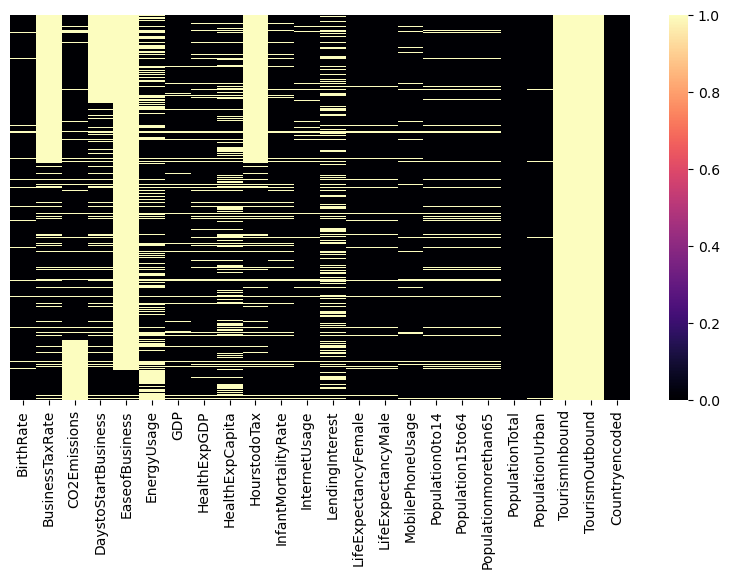

In [17]:
#visualizing the null values for each attribute
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull(),cmap='magma',yticklabels=False,cbar=True)
plt.show()

In [18]:
#removes rows having null values
data.dropna(subset=['PopulationUrban'],inplace=True)

#check the null values
data.isnull().sum()


BirthRate                119
BusinessTaxRate         1259
CO2Emissions             553
DaystoStartBusiness      964
EaseofBusiness          2494
EnergyUsage              905
GDP                      197
HealthExpGDP             283
HealthExpCapita          746
HourstodoTax            1266
InfantMortalityRate      234
InternetUsage            147
LendingInterest          807
LifeExpectancyFemale     136
LifeExpectancyMale       136
MobilePhoneUsage         141
Population0to14          195
Population15to64         195
Populationmorethan65     195
PopulationTotal            0
PopulationUrban            0
TourismInbound          2678
TourismOutbound         2678
Countryencoded             0
dtype: int64

In [19]:
#Repalce missing values by mean
data['BusinessTaxRate']= data['BusinessTaxRate'].fillna(data['BusinessTaxRate'].mean())
data['EaseofBusiness']= data['EaseofBusiness'].fillna(data['EaseofBusiness'].mean())
data['HealthExpGDP']= data['HealthExpGDP'].fillna(data['HealthExpGDP'].mean())
data['HourstodoTax']= data['HourstodoTax'].fillna(data['HourstodoTax'].mean())
data['Population0to14 ']= data['Population0to14'].fillna(data['Population0to14'].mean())


#Replace missing values by median
data['BirthRate']= data['BirthRate'].fillna(data['BirthRate'].median())
data['CO2Emissions']= data['CO2Emissions'].fillna(data['CO2Emissions'].median())
data['DaystoStartBusiness']= data['DaystoStartBusiness'].fillna(data['DaystoStartBusiness'].median())
data['EnergyUsage']= data['EnergyUsage'].fillna(data['EnergyUsage'].median())
data['HealthExpCapita']= data['HealthExpCapita'].fillna(data['HealthExpCapita'].median())
data['GDP']= data['GDP'].fillna(data['GDP'].median())
data['InfantMortalityRate']= data['InfantMortalityRate'].fillna(data['InfantMortalityRate'].median())
data['InternetUsage']= data['InternetUsage'].fillna(data['InternetUsage'].median())
data['LendingInterest']= data['LendingInterest'].fillna(data['LendingInterest'].median())
data['LifeExpectancyFemale']= data['LifeExpectancyFemale'].fillna(data['LifeExpectancyFemale'].median())
data['LifeExpectancyMale']= data['LifeExpectancyMale'].fillna(data['LifeExpectancyMale'].median())
data['MobilePhoneUsage']= data['MobilePhoneUsage'].fillna(data['MobilePhoneUsage'].median())
data['TourismInbound']= data['TourismInbound'].fillna(data['TourismInbound'].median())
data['TourismOutbound']= data['TourismOutbound'].fillna(data['TourismOutbound'].median())
data['Population15to64']= data['Population15to64'].fillna(data['Population15to64'].median())
data['Populationmorethan65']= data['Populationmorethan65'].fillna(data['Populationmorethan65'].median())


In [20]:
#check the missing values
print("{} missing values present in whole data.".format(data.isnull().sum().sum()))

5551 missing values present in whole data.


In [21]:
##making copy of data
data1 = data.copy()
data2 = data.copy()
data3 = data.copy()

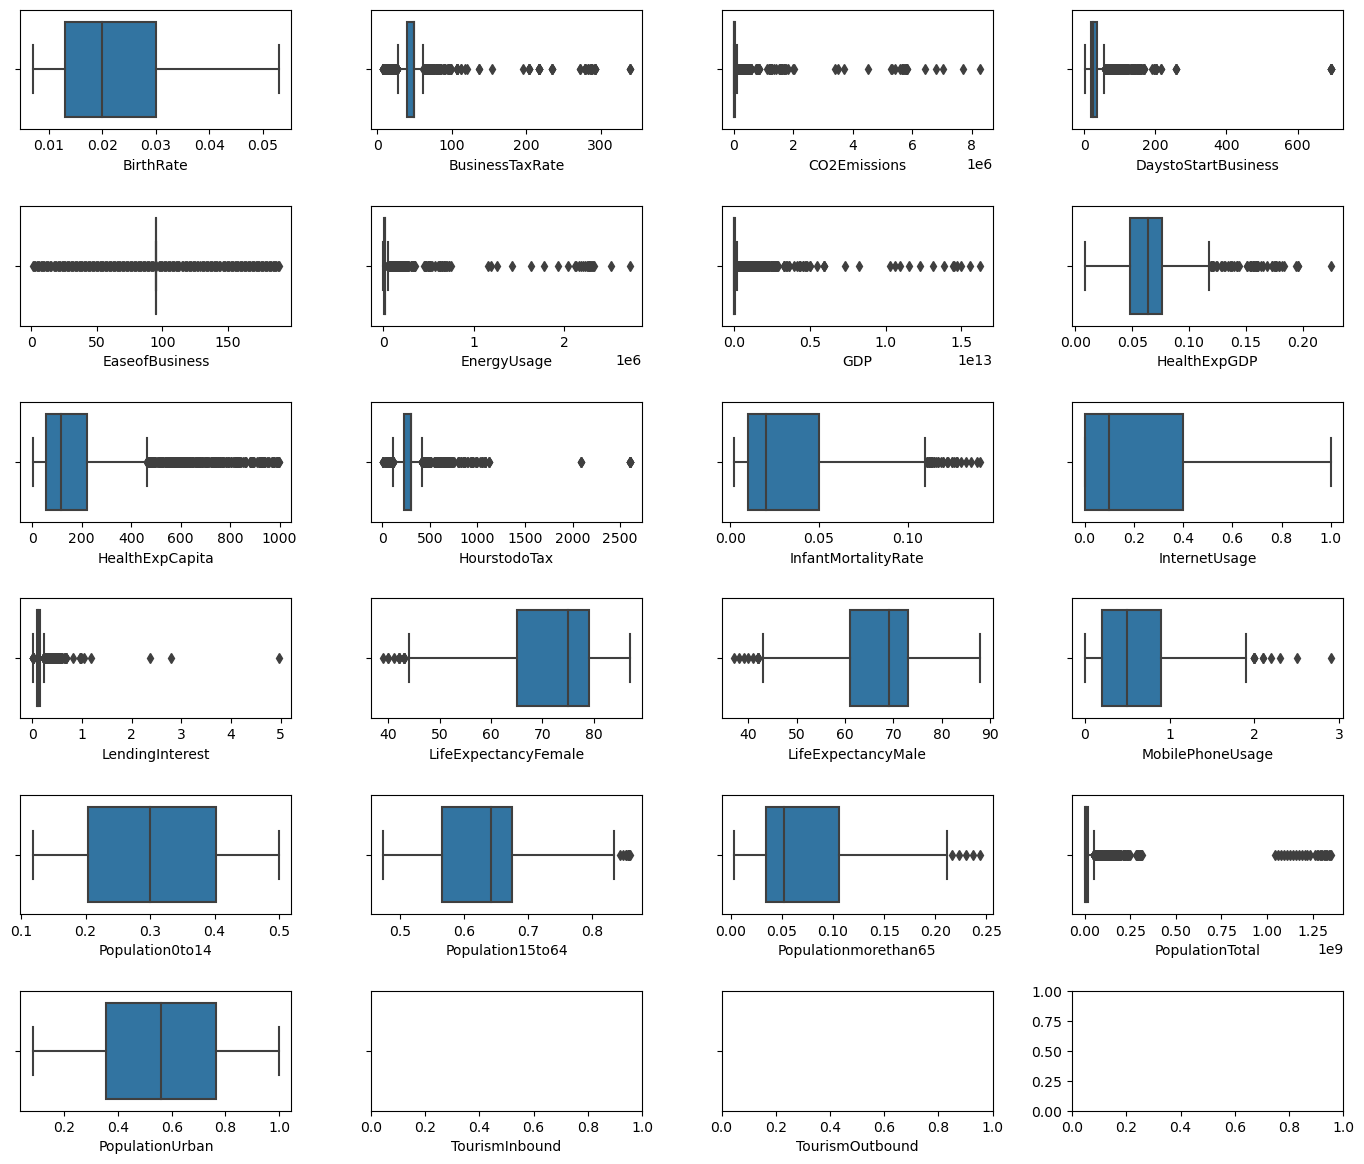

In [22]:
#check outliers present in data1
fig, axes=plt.subplots(6,4,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(data1.BirthRate,ax=axes[0,0])
sns.boxplot(data1.BusinessTaxRate,ax=axes[0,1])
sns.boxplot(data1.CO2Emissions,ax=axes[0,2])
sns.boxplot(data1.DaystoStartBusiness,ax=axes[0,3])
sns.boxplot(data1.EaseofBusiness,ax=axes[1,0])
sns.boxplot(data1.EnergyUsage,ax=axes[1,1])
sns.boxplot(data1.GDP,ax=axes[1,2])
sns.boxplot(data1.HealthExpGDP,ax=axes[1,3])
sns.boxplot(data1.HealthExpCapita,ax=axes[2,0])
sns.boxplot(data1.HourstodoTax,ax=axes[2,1])
sns.boxplot(data1.InfantMortalityRate,ax=axes[2,2])
sns.boxplot(data1.InternetUsage,ax=axes[2,3,])
sns.boxplot(data1.LendingInterest,ax=axes[3,0])
sns.boxplot(data1.LifeExpectancyFemale,ax=axes[3,1])
sns.boxplot(data1.LifeExpectancyMale,ax=axes[3,2])
sns.boxplot(data1.MobilePhoneUsage,ax=axes[3,3])
sns.boxplot(data1.Population0to14,ax=axes[4,0])          
sns.boxplot(data1.Population15to64,ax=axes[4,1])
sns.boxplot(data1.Populationmorethan65,ax=axes[4,2])
sns.boxplot(data1.PopulationTotal,ax=axes[4,3])
sns.boxplot(data1.PopulationUrban,ax=axes[5,0])
sns.boxplot(data1.TourismInbound,ax=axes[5,1])
sns.boxplot(data1.TourismOutbound,ax=axes[5,2])
plt.tight_layout(pad=2.0)

In [23]:
data.iloc[:-2, 0] = np.NaN
data.iloc[3, 1] = np.NaN
data.iloc[4, 2] = np.NaN
data

,BirthRate,BusinessTaxRate,CO2Emissions,DaystoStartBusiness,EaseofBusiness,EnergyUsage,GDP,HealthExpGDP,HealthExpCapita,HourstodoTax,...,MobilePhoneUsage,Population0to14,Population15to64,Populationmorethan65,PopulationTotal,PopulationUrban,TourismInbound,TourismOutbound,Countryencoded,Population0to14
0,NaN,49.051656,87931.0,26.0,94.869565,26998.0,5.479006e+10,0.03500,60.0,302.461048,...,0.0,0.342,0.619,0.039,31719449,0.599,NaN,NaN,2.0,0.342000
1,NaN,49.051656,9542.0,26.0,94.869565,7499.0,9.129595e+09,0.03400,22.0,302.461048,...,0.0,0.476,0.499,0.025,13924930,0.324,NaN,NaN,5.0,0.476000
2,NaN,49.051656,1617.0,26.0,94.869565,1983.0,2.359122e+09,0.04300,15.0,302.461048,...,0.0,0.454,0.517,0.029,6949366,0.383,NaN,NaN,20.0,0.454000
3,NaN,NaN,4276.0,26.0,94.869565,1836.0,5.788312e+09,0.04700,152.0,302.461048,...,0.1,0.383,0.587,0.029,1755375,0.532,NaN,NaN,25.0,0.383000
4,NaN,49.051656,NaN,26.0,94.869565,14673.0,2.610959e+09,0.05100,12.0,302.461048,...,0.0,0.468,0.505,0.028,11607944,0.178,NaN,NaN,29.0,0.468000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,NaN,49.051656,8529.0,26.0,94.869565,14673.0,1.549332e+10,0.06417,115.5,302.461048,...,0.5,NaN,0.642,0.052,32427,0.911,NaN,NaN,193.0,0.303062
2700,NaN,46.400000,8529.0,5.0,4.000000,2132446.0,1.624460e+13,0.17900,115.5,175.000000,...,1.0,0.196,0.667,0.136,313873685,0.811,NaN,NaN,198.0,0.196000
2701,NaN,41.900000,8529.0,7.0,85.000000,14673.0,5.000435e+10,0.08900,115.5,310.000000,...,1.5,0.220,0.639,0.140,3395253,0.948,NaN,NaN,199.0,0.220000
2702,0.020,61.900000,8529.0,144.0,180.000000,14673.0,3.812862e+11,0.04600,593.0,792.000000,...,1.0,0.288,0.652,0.060,29954782,0.889,NaN,NaN,202.0,0.288000


In [24]:
data.drop(['TourismOutbound','TourismInbound'],axis=1,inplace =True)

In [25]:
data.head()

,BirthRate,BusinessTaxRate,CO2Emissions,DaystoStartBusiness,EaseofBusiness,EnergyUsage,GDP,HealthExpGDP,HealthExpCapita,HourstodoTax,...,LifeExpectancyFemale,LifeExpectancyMale,MobilePhoneUsage,Population0to14,Population15to64,Populationmorethan65,PopulationTotal,PopulationUrban,Countryencoded,Population0to14
0,NaN,49.051656,87931.0,26.0,94.869565,26998.0,5.479006e+10,0.035,60.0,302.461048,...,71.0,67.0,0.0,0.342,0.619,0.039,31719449,0.599,2.0,0.342
1,NaN,49.051656,9542.0,26.0,94.869565,7499.0,9.129595e+09,0.034,22.0,302.461048,...,47.0,44.0,0.0,0.476,0.499,0.025,13924930,0.324,5.0,0.476
2,NaN,49.051656,1617.0,26.0,94.869565,1983.0,2.359122e+09,0.043,15.0,302.461048,...,57.0,53.0,0.0,0.454,0.517,0.029,6949366,0.383,20.0,0.454
3,NaN,NaN,4276.0,26.0,94.869565,1836.0,5.788312e+09,0.047,152.0,302.461048,...,52.0,49.0,0.1,0.383,0.587,0.029,1755375,0.532,25.0,0.383
4,NaN,49.051656,NaN,26.0,94.869565,14673.0,2.610959e+09,0.051,12.0,302.461048,...,52.0,49.0,0.0,0.468,0.505,0.028,11607944,0.178,29.0,0.468


In [26]:
data.drop(['BirthRate'],axis=1,inplace=True)

In [27]:
data.head()

,BusinessTaxRate,CO2Emissions,DaystoStartBusiness,EaseofBusiness,EnergyUsage,GDP,HealthExpGDP,HealthExpCapita,HourstodoTax,InfantMortalityRate,...,LifeExpectancyFemale,LifeExpectancyMale,MobilePhoneUsage,Population0to14,Population15to64,Populationmorethan65,PopulationTotal,PopulationUrban,Countryencoded,Population0to14
0,49.051656,87931.0,26.0,94.869565,26998.0,5.479006e+10,0.035,60.0,302.461048,0.034,...,71.0,67.0,0.0,0.342,0.619,0.039,31719449,0.599,2.0,0.342
1,49.051656,9542.0,26.0,94.869565,7499.0,9.129595e+09,0.034,22.0,302.461048,0.128,...,47.0,44.0,0.0,0.476,0.499,0.025,13924930,0.324,5.0,0.476
2,49.051656,1617.0,26.0,94.869565,1983.0,2.359122e+09,0.043,15.0,302.461048,0.090,...,57.0,53.0,0.0,0.454,0.517,0.029,6949366,0.383,20.0,0.454
3,NaN,4276.0,26.0,94.869565,1836.0,5.788312e+09,0.047,152.0,302.461048,0.054,...,52.0,49.0,0.1,0.383,0.587,0.029,1755375,0.532,25.0,0.383
4,49.051656,NaN,26.0,94.869565,14673.0,2.610959e+09,0.051,12.0,302.461048,0.096,...,52.0,49.0,0.0,0.468,0.505,0.028,11607944,0.178,29.0,0.468


In [28]:
#Outlier remove
Q1 = data1.quantile(0.25)
Q3 = data1.quantile(0.75)
IQR = Q3-Q1
data1 = data1[~((data1 <(Q1 -1.5 * IQR)) |(data1 > (Q3 +1.5 * IQR))).any(axis=1)]

In [29]:
#standardization of data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scale_data = scaler.fit_transform(data1)

In [30]:
# Example data preprocessing steps
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Check for and handle missing values
# Assuming scale_data is your input data
# Replace NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')
scale_data = imputer.fit_transform(scale_data)

# Scale the data
scaler = StandardScaler()
scale_data = scaler.fit_transform(scale_data)

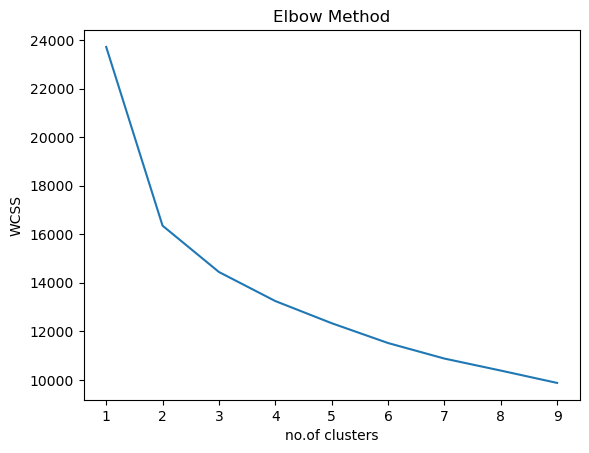

In [31]:
from sklearn.cluster import KMeans
WCSS = []
for i in range(1,10):
    k = KMeans(n_clusters=i).fit(scale_data)
    WCSS.append(k.inertia_)
plt.plot(range(1,10),WCSS)
plt.title('Elbow Method')
plt.xlabel('no.of clusters')
plt.ylabel('WCSS')
plt.show() 

In [32]:
from sklearn.cluster import KMeans
k = KMeans(n_clusters=7,init='k-means++',random_state=49).fit(scale_data)
k_labels= k.labels_

In [33]:
print(k_labels)

[4 3 3 ... 2 2 6]


In [34]:
clusters = pd.DataFrame(k_labels)
clusters

,0
0,4
1,3
2,3
3,3
4,3
...,...
1073,6
1074,5
1075,2
1076,2


In [35]:
data = data1.reset_index().drop(['index'],axis=1)

In [36]:
data['clusters']= clusters
data

,BirthRate,BusinessTaxRate,CO2Emissions,DaystoStartBusiness,EaseofBusiness,EnergyUsage,GDP,HealthExpGDP,HealthExpCapita,HourstodoTax,...,Population0to14,Population15to64,Populationmorethan65,PopulationTotal,PopulationUrban,TourismInbound,TourismOutbound,Countryencoded,Population0to14,clusters
0,0.020,49.051656,87931.0,26.0,94.869565,26998.0,5.479006e+10,0.03500,60.0,302.461048,...,0.342,0.619,0.039,31719449,0.599,NaN,NaN,2.0,0.342000,4
1,0.043,49.051656,1617.0,26.0,94.869565,1983.0,2.359122e+09,0.04300,15.0,302.461048,...,0.454,0.517,0.029,6949366,0.383,NaN,NaN,20.0,0.454000,3
2,0.027,49.051656,4276.0,26.0,94.869565,1836.0,5.788312e+09,0.04700,152.0,302.461048,...,0.383,0.587,0.029,1755375,0.532,NaN,NaN,25.0,0.383000,3
3,0.046,49.051656,1041.0,26.0,94.869565,14673.0,2.610959e+09,0.05100,12.0,302.461048,...,0.468,0.505,0.028,11607944,0.178,NaN,NaN,29.0,0.468000,3
4,0.042,49.051656,301.0,26.0,94.869565,14673.0,8.704861e+08,0.06300,7.0,302.461048,...,0.490,0.481,0.029,6674286,0.082,NaN,NaN,30.0,0.490000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,0.013,49.051656,8529.0,26.0,94.869565,14673.0,1.549332e+10,0.06417,115.5,302.461048,...,0.195,0.668,0.137,152056,0.897,NaN,NaN,47.0,0.195000,6
1074,0.014,49.051656,8529.0,26.0,94.869565,14673.0,1.549332e+10,0.06417,115.5,302.461048,...,NaN,0.642,0.052,56810,0.852,NaN,NaN,72.0,0.303062,5
1075,0.020,49.051656,8529.0,26.0,94.869565,14673.0,1.549332e+10,0.06417,115.5,302.461048,...,NaN,0.642,0.052,39088,1.000,NaN,NaN,164.0,0.303062,2
1076,0.020,49.051656,8529.0,26.0,94.869565,14673.0,1.549332e+10,0.06417,115.5,302.461048,...,NaN,0.642,0.052,32427,0.911,NaN,NaN,193.0,0.303062,2


In [37]:
data2=data.iloc[:,0:-1]
data2

,BirthRate,BusinessTaxRate,CO2Emissions,DaystoStartBusiness,EaseofBusiness,EnergyUsage,GDP,HealthExpGDP,HealthExpCapita,HourstodoTax,...,MobilePhoneUsage,Population0to14,Population15to64,Populationmorethan65,PopulationTotal,PopulationUrban,TourismInbound,TourismOutbound,Countryencoded,Population0to14
0,0.020,49.051656,87931.0,26.0,94.869565,26998.0,5.479006e+10,0.03500,60.0,302.461048,...,0.0,0.342,0.619,0.039,31719449,0.599,NaN,NaN,2.0,0.342000
1,0.043,49.051656,1617.0,26.0,94.869565,1983.0,2.359122e+09,0.04300,15.0,302.461048,...,0.0,0.454,0.517,0.029,6949366,0.383,NaN,NaN,20.0,0.454000
2,0.027,49.051656,4276.0,26.0,94.869565,1836.0,5.788312e+09,0.04700,152.0,302.461048,...,0.1,0.383,0.587,0.029,1755375,0.532,NaN,NaN,25.0,0.383000
3,0.046,49.051656,1041.0,26.0,94.869565,14673.0,2.610959e+09,0.05100,12.0,302.461048,...,0.0,0.468,0.505,0.028,11607944,0.178,NaN,NaN,29.0,0.468000
4,0.042,49.051656,301.0,26.0,94.869565,14673.0,8.704861e+08,0.06300,7.0,302.461048,...,0.0,0.490,0.481,0.029,6674286,0.082,NaN,NaN,30.0,0.490000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,0.013,49.051656,8529.0,26.0,94.869565,14673.0,1.549332e+10,0.06417,115.5,302.461048,...,1.3,0.195,0.668,0.137,152056,0.897,NaN,NaN,47.0,0.195000
1074,0.014,49.051656,8529.0,26.0,94.869565,14673.0,1.549332e+10,0.06417,115.5,302.461048,...,1.0,NaN,0.642,0.052,56810,0.852,NaN,NaN,72.0,0.303062
1075,0.020,49.051656,8529.0,26.0,94.869565,14673.0,1.549332e+10,0.06417,115.5,302.461048,...,0.5,NaN,0.642,0.052,39088,1.000,NaN,NaN,164.0,0.303062
1076,0.020,49.051656,8529.0,26.0,94.869565,14673.0,1.549332e+10,0.06417,115.5,302.461048,...,0.5,NaN,0.642,0.052,32427,0.911,NaN,NaN,193.0,0.303062


In [38]:
data2.drop(['TourismOutbound','TourismInbound'],axis=1,inplace =True)

In [39]:
data2.head()

,BirthRate,BusinessTaxRate,CO2Emissions,DaystoStartBusiness,EaseofBusiness,EnergyUsage,GDP,HealthExpGDP,HealthExpCapita,HourstodoTax,...,LifeExpectancyFemale,LifeExpectancyMale,MobilePhoneUsage,Population0to14,Population15to64,Populationmorethan65,PopulationTotal,PopulationUrban,Countryencoded,Population0to14
0,0.020,49.051656,87931.0,26.0,94.869565,26998.0,5.479006e+10,0.035,60.0,302.461048,...,71.0,67.0,0.0,0.342,0.619,0.039,31719449,0.599,2.0,0.342
1,0.043,49.051656,1617.0,26.0,94.869565,1983.0,2.359122e+09,0.043,15.0,302.461048,...,57.0,53.0,0.0,0.454,0.517,0.029,6949366,0.383,20.0,0.454
2,0.027,49.051656,4276.0,26.0,94.869565,1836.0,5.788312e+09,0.047,152.0,302.461048,...,52.0,49.0,0.1,0.383,0.587,0.029,1755375,0.532,25.0,0.383
3,0.046,49.051656,1041.0,26.0,94.869565,14673.0,2.610959e+09,0.051,12.0,302.461048,...,52.0,49.0,0.0,0.468,0.505,0.028,11607944,0.178,29.0,0.468
4,0.042,49.051656,301.0,26.0,94.869565,14673.0,8.704861e+08,0.063,7.0,302.461048,...,49.0,47.0,0.0,0.490,0.481,0.029,6674286,0.082,30.0,0.490


In [40]:
#standardization of data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [41]:
X=pd.DataFrame(scaler.fit_transform(data2))
y=data.clusters
              

In [42]:
#metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
#cross validation
from sklearn.model_selection  import cross_val_score 
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier


In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Assuming X_train and y_train are your training data

# Check for and handle missing values in X_train and y_train
# Replace NaN values with the mean of each column for X_train
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Now you can proceed with fitting the Gradient Boosting Classifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)


GradientBoostingClassifier()

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Assuming X_train, y_train, X_test, y_test are your training and test data

# Check for and handle missing values in X_train and X_test
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit the Gradient Boosting Classifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# Predict using the trained model
y_pred_gb = gb.predict(X_test)

# Calculate accuracy
accuracy_gb = round(accuracy_score(y_test, y_pred_gb), 4)
print("Accuracy:", accuracy_gb)

Accuracy: 0.9583


In [46]:
accuracy_gb =accuracy_score(y_test, y_pred_gb)
report_gb = classification_report(y_test,y_pred_gb)
print("accuracy",accuracy_gb)
print("Classification Report:\n",report_gb)

accuracy 0.9583333333333334
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       1.00      1.00      1.00        10
           2       0.98      0.94      0.96        53
           3       0.98      0.98      0.98        58
           4       0.93      1.00      0.97        14
           5       0.86      0.97      0.91        31
           6       0.97      0.92      0.94        36

    accuracy                           0.96       216
   macro avg       0.96      0.96      0.96       216
weighted avg       0.96      0.96      0.96       216



In [47]:
import pickle

#Assuming 'gb' is your trained GradientBoostingClassifier
#you have already trained it and now to save it a file
model_gb = "gradient_boosting_model.pkl"


#save the model in a pickle file
with open(model_gb,'wb') as model_file:
    pickle.dump(gb,model_file)

print(f"Gradient_Boosting model saved as {model_gb}")
    

Gradient_Boosting model saved as gradient_boosting_model.pkl


In [48]:
import pandas as pd
import pickle


#Save the data as a pickle file
data_filname ="world_development_data.pkl"
with open(data_filname,'wb') as data_file:
    pickle.dump(data,data_file)

print(f"csv data saved as {data_filname}")

csv data saved as world_development_data.pkl
